In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv("stroke.csv", index_col=None)
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [6]:
df.shape
df['id'].value_counts()

df.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1


In [7]:
print(df.isna().sum())
print(df.dtypes)


df = df.drop(['id'], axis=1)
print(df.isna().sum()/df.shape[0]*100)
df = df.dropna(subset=['bmi'])
mode = df['smoking_status'].mode().iloc[0]
df['smoking_status'] = df['smoking_status'].fillna(mode)
# Encode the 'gender' column
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# Encode the 'ever_married' column
df['ever_married'] = le.fit_transform(df['ever_married'])

# Encode the 'work_type' column
df['work_type'] = le.fit_transform(df['work_type'])

# Encode the 'Residence_type' column
df['Residence_type'] = le.fit_transform(df['Residence_type'])

# Encode the 'smoking_status' column
df['smoking_status'] = le.fit_transform(df['smoking_status'])

scaler = StandardScaler()
columns_to_scale = ['age', 'avg_glucose_level', 'bmi']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

X = df.drop(['stroke'], axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.00

<AxesSubplot:>

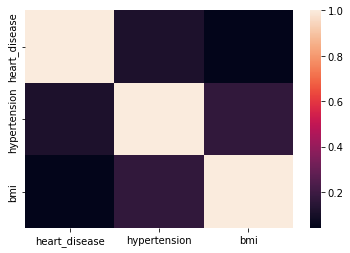

In [26]:
df[['heart_disease', 'hypertension', 'bmi']].corr()
import seaborn as sns


sns.heatmap(df[['heart_disease', 'hypertension', 'bmi']].corr())

In [8]:
X = df[['age', 'hypertension', 'heart_disease']]
y = df['work_type']
 
print(X.shape)
print(y.shape)

(4909, 3)
(4909,)


<AxesSubplot:>

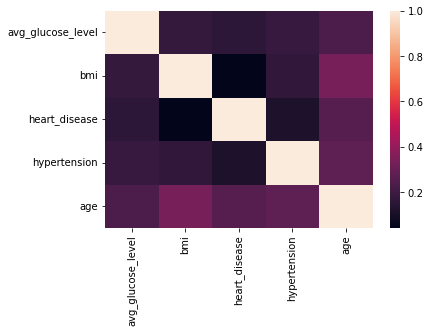

In [27]:
sns.heatmap(df[['avg_glucose_level', 'bmi', 'heart_disease', 'hypertension', 'age']].corr())

In [9]:
print("Stroke.keys():\n", df.keys())
print("Shape of stroke data:", df.shape)

Stroke.keys():
 Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Shape of stroke data: (4909, 11)


In [10]:
print("Sample counts per class:\n{}".format(
 {n: v for n, v in zip(df.gender, np.bincount(df.stroke))}))

Sample counts per class:
{1: 209}


In [12]:
from sklearn.model_selection import train_test_split
X = df.drop("stroke", axis=1)
y = df["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=.1, max_iter=2000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))


Training set score: 0.960
Test score: 0.95


In [17]:
from sklearn.preprocessing import StandardScaler

#scaling train and test data
std = StandardScaler().fit(X_train)
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.fit_transform(X_test)



In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

rf.fit(X_train,y_train)
train_score = rf.score(X_train,y_train)
test_score = rf.score(X_test,y_test)
print ("Normal: {:7.3f} {:7.3f}".format( train_score, test_score))

rf.fit(X_train_scaled,y_train)
train_score = rf.score(X_train_scaled,y_train)
test_score = rf.score(X_test_scaled,y_test)
print ("Scaled: {:7.3f} {:7.3f}".format( train_score, test_score))

Normal:   1.000   0.946
Scaled:   1.000   0.946


In [19]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Normal")
print("train",mlp.score(X_train,y_train))
print ("test ",mlp.score(X_test,y_test))

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)
print("Scaled")
print("train",mlp.score(X_train_scaled,y_train))
print ("test ",mlp.score(X_test_scaled,y_test))

C:\Users\Julci\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Normal
train 0.9623121976063153
test  0.945010183299389
Scaled
train 0.9625668449197861
test  0.945010183299389


C:\Users\Julci\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train, y_train)
print("DT train:", dt.score(X_train,y_train))
print("DT test: ",dt.score(X_test,y_test))

DT train: 1.0
DT test:  -0.5157706602758094


In [22]:
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print("RF train:",rf.score(X_train,y_train))
print("RF test: ", rf.score(X_test,y_test))

RF train: 0.8555762300348816
RF test:  0.01188107317667575


In [24]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)


print(format(knn.score(X_train, y_train)))
print(format(knn.score(X_test, y_test)))

0.9623121976063153
0.945010183299389


In [25]:
knn = KNeighborsClassifier()

neighbors_setting = range(1,21)

for n in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    trainScore = clf.score(X_train, y_train)
    testScore = clf.score(X_test, y_test)
    print(testScore, trainScore,n)

0.9205702647657841 1.0 1
0.9439918533604889 0.962821492233257 2
0.9419551934826884 0.9640947288006112 3
0.9460285132382892 0.9615482556659027 4
0.945010183299389 0.9623121976063153 5
0.9460285132382892 0.961038961038961 6
0.9470468431771895 0.9607843137254902 7
0.9460285132382892 0.9600203717850777 8
0.945010183299389 0.9602750190985485 9
0.9460285132382892 0.9602750190985485 10
0.9460285132382892 0.9602750190985485 11
0.9460285132382892 0.9602750190985485 12
0.9460285132382892 0.9602750190985485 13
0.9460285132382892 0.9602750190985485 14
0.9460285132382892 0.9602750190985485 15
0.9460285132382892 0.9602750190985485 16
0.9460285132382892 0.9602750190985485 17
0.9460285132382892 0.9602750190985485 18
0.9460285132382892 0.9602750190985485 19
0.9460285132382892 0.9602750190985485 20


In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state = 0, max_depth=2)

dtree.fit(X_train, y_train)

score_train = dtree.score(X_train, y_train)
score_test = dtree.score(X_test, y_test)

print((score_train, score_test))


(0.9602750190985485, 0.9460285132382892)


In [ ]:
//to do implement smote and then do it all again with smote

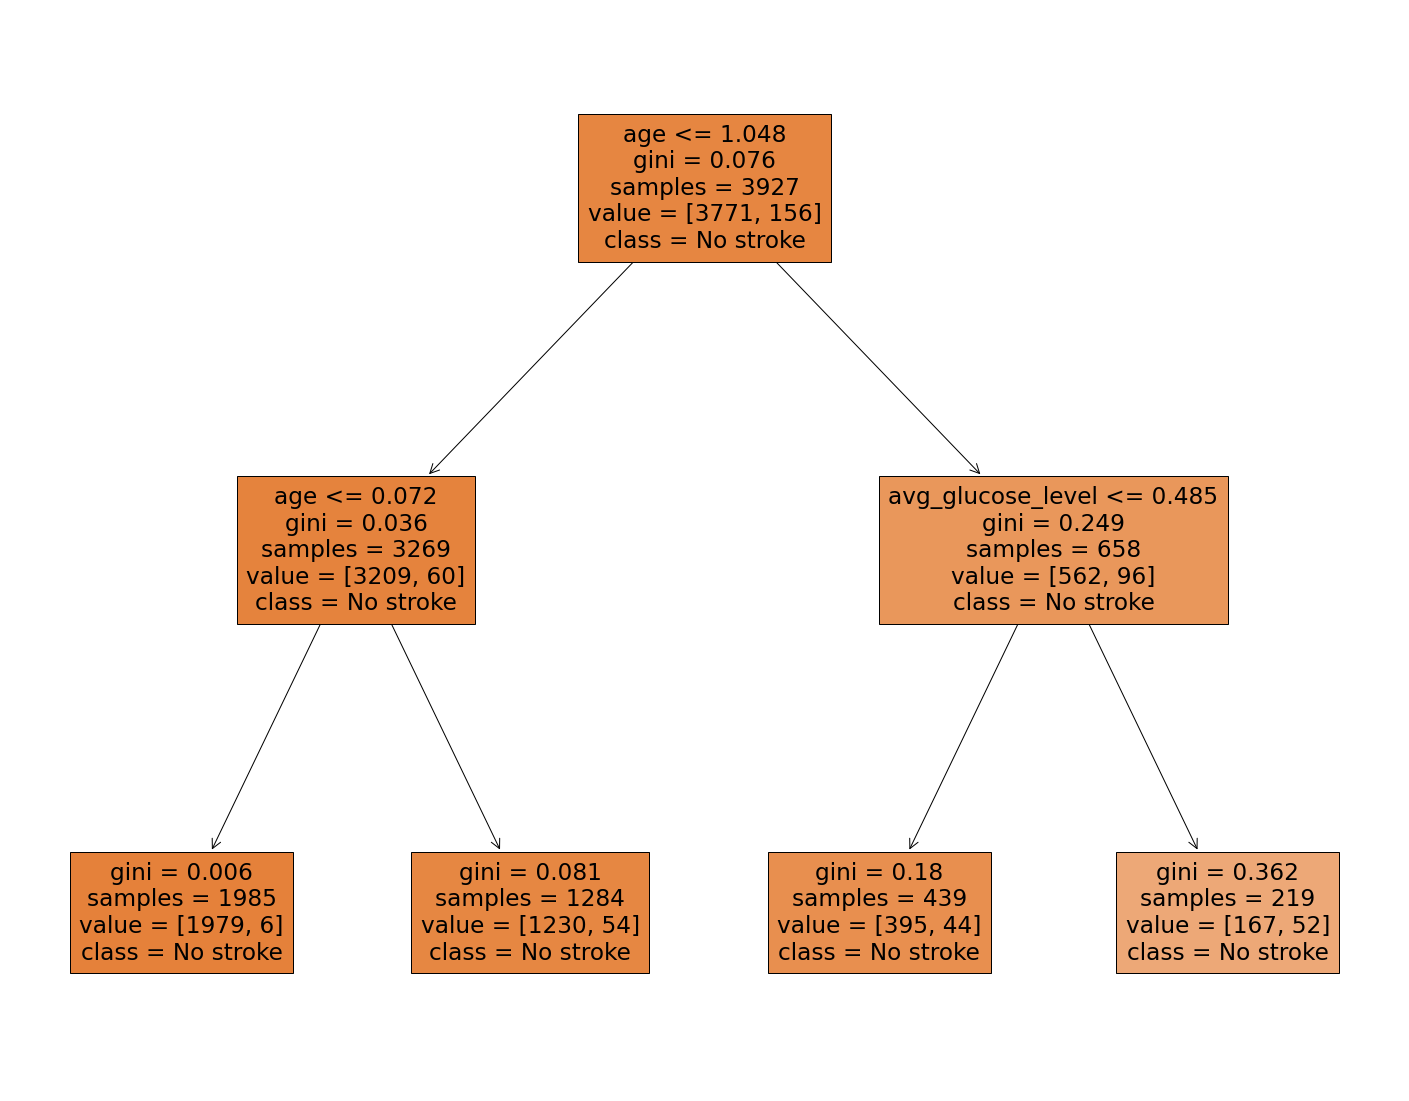

In [34]:
# Use this code to display tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))
plot_tree(dtree, class_names=["No stroke","Stroke"], feature_names = X.columns, 
                   filled=True)
plt.show()

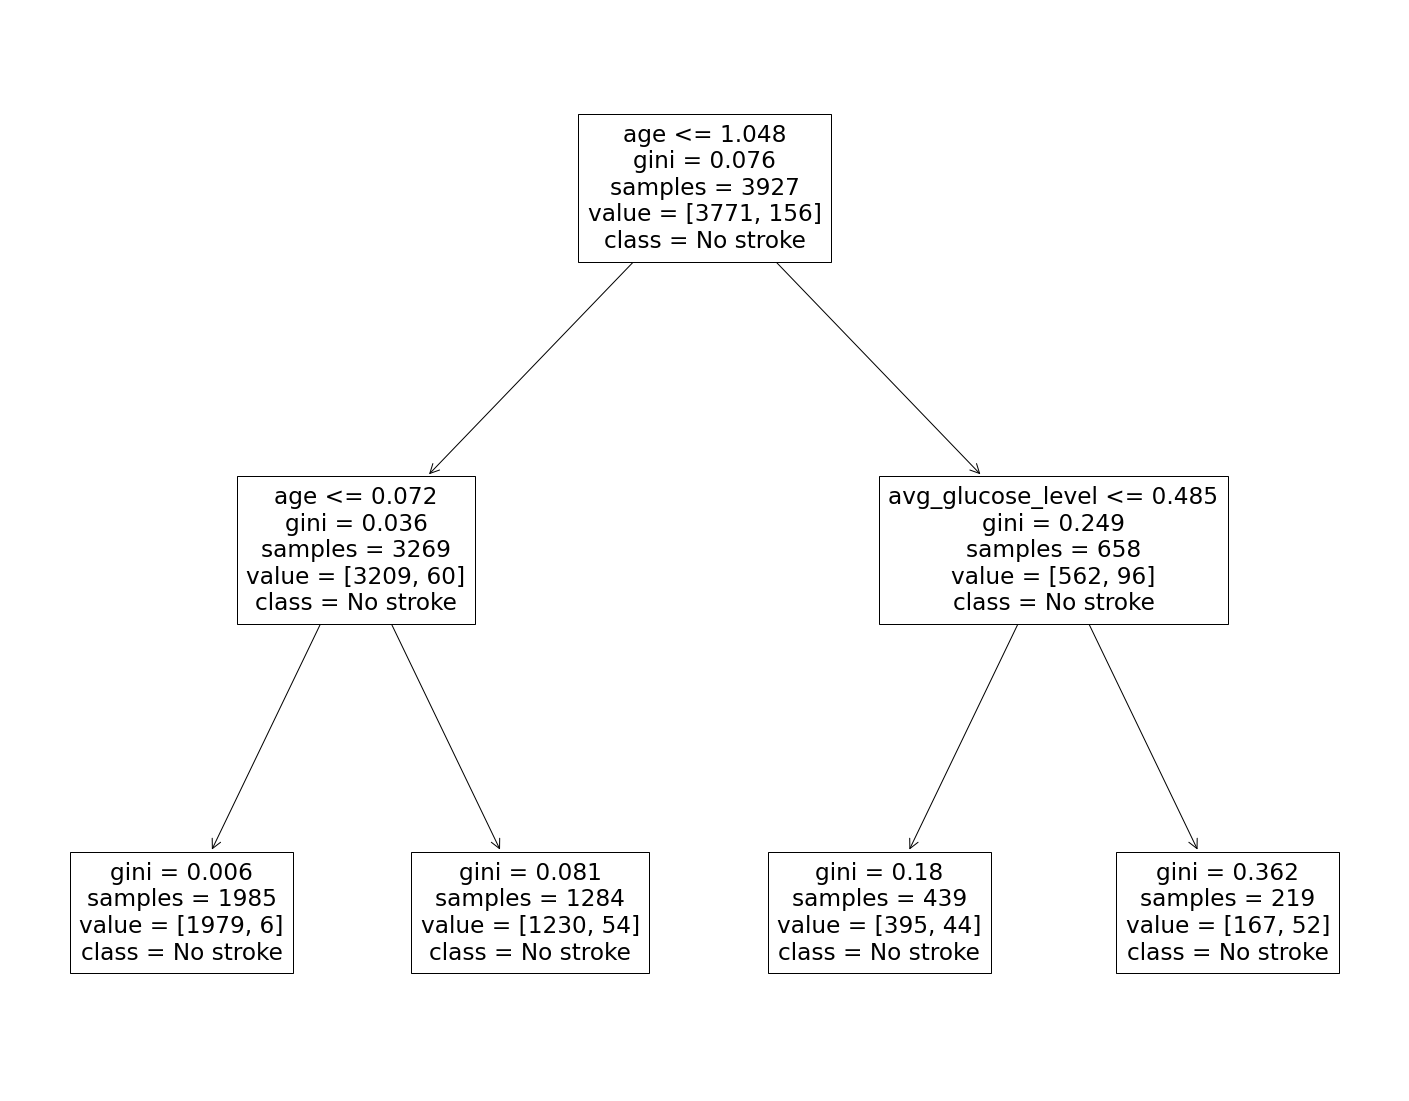

In [35]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))
plot_tree(dtree, class_names=["No stroke","Stroke"], feature_names = X.columns, 
                   filled=False)
plt.show()